In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd

from config import Config
from img_util import show_img_tensor_CHW
from fliker_img_comment_dataset import ImgCommentDataset
from pathlib import Path
import torch
from torch.utils.data import DataLoader


/opt/anaconda3/envs/torch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
config = Config()

img_comments_file = config.img_comments_folder / "results.csv" # /Users/chengbai/ml/dataset/flickr30k_images/results.csv
imgs_folder = config.img_comments_folder / "flickr30k_images"  # /Users/chengbai/ml/dataset/flickr30k_images/flickr30k_images

list(imgs_folder.glob("*.jpg"))[:2]

[PosixPath('/Users/chengbai/ml/dataset/flickr30k_images/flickr30k_images/2609797461.jpg'),
 PosixPath('/Users/chengbai/ml/dataset/flickr30k_images/flickr30k_images/1788892671.jpg')]

In [3]:
# The current `results.csv` file is using "| " to seperate 3 columns. 
# For the pd.read_csv, the `sep` here is given as a regular expression. 
df = pd.read_csv(img_comments_file, sep="|", index_col=False)
df = df.astype({'image_name': 'str', 'comment_number': int, 'comment': str})
df1 = df[0: 1]
list(df1["image_name"]), df1["image_name"][0]


(['1000092795.jpg'], '1000092795.jpg')

In [4]:
train_dataset = ImgCommentDataset(config, split="train")
eval_dataset = ImgCommentDataset(config, split="eval")
test_dataset = ImgCommentDataset(config, split="test")
print(len(train_dataset), len(eval_dataset), len(test_dataset))

Enriched img id: /tmp/enriched_results.csv
tokens: 128000
tokenizer.is_fast: True
Enriched img id: /tmp/enriched_results.csv
tokens: 128000
tokenizer.is_fast: True
Enriched img id: /tmp/enriched_results.csv
tokens: 128000
tokenizer.is_fast: True
114418 28605 15892


In [5]:
# train_dataset.cache_data()
# eval_dataset.cache_data()
# test_dataset.cache_data()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0061062663..1.0000002].


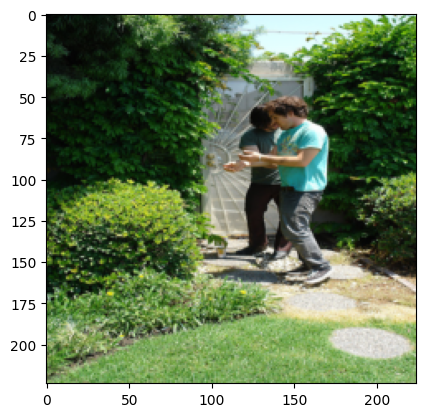

In [6]:
img_tensor, img_id_tensor, comment_encoding, comment_mask = train_dataset[0]
show_img_tensor_CHW(img_tensor)

In [7]:
# Data Loader
BATCH_SIZE = 2
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
eval_dataloader = DataLoader(eval_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [8]:
# for batch_data in train_dataloader:
#     print(train_dataloader)
#     break
batch_img_tensors, batch_img_id_tensors, batch_text_encodings, batch_text_masks = next(iter(train_dataloader))
print(f"batch_img_tensors: {batch_img_tensors.size()}")
print(f"batch_img_id_tensors: {batch_img_id_tensors.size()}")
print(f"batch_text_encodings: {batch_text_encodings.size()}")
print(f"batch_text_masks: {batch_text_masks.size()}")

ValueError: too many values to unpack (expected 3)

In [ ]:
plt.imshow(batch_img_tensors[0].permute(1, 2, 0)) # C x H x W => H x W x C